In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()

In [3]:
clf_gnb = GaussianNB()

In [4]:
x_train_gnb, x_test_gnb, y_train_gnb, y_test_gnb = train_test_split(digits.data, digits.target)

In [5]:
clf_gnb.fit(x_train_gnb, y_train_gnb)

GaussianNB()

In [6]:
predicted_gnb = clf_gnb.predict(x_test_gnb)
expected_gnb = y_test_gnb

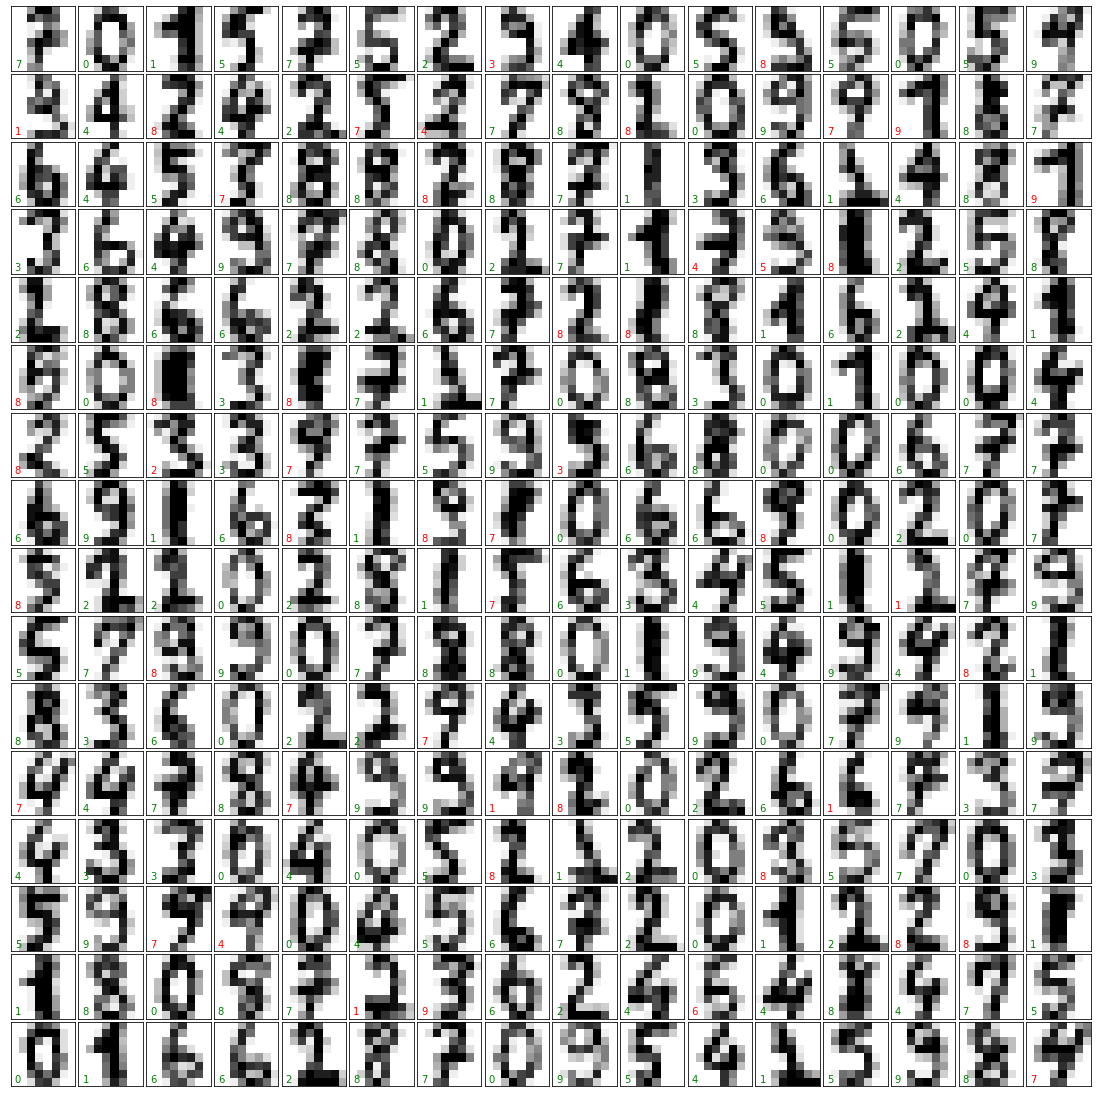

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(256):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test_gnb.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    if predicted_gnb[i] == expected_gnb[i]:
        ax.text(0, 7, str(predicted_gnb[i]), color='green')
    else:
        ax.text(0, 7, str(predicted_gnb[i]), color='red')

In [8]:
print(metrics.classification_report(expected_gnb, predicted_gnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.82      0.71      0.76        45
           2       0.97      0.66      0.79        53
           3       0.85      0.72      0.78        39
           4       0.90      0.86      0.88        44
           5       0.95      0.84      0.89        50
           6       0.98      0.98      0.98        41
           7       0.71      0.97      0.82        40
           8       0.54      0.98      0.69        45
           9       0.85      0.58      0.69        48

    accuracy                           0.82       450
   macro avg       0.86      0.83      0.83       450
weighted avg       0.86      0.82      0.83       450



In [9]:
d_gnb = [array for array in metrics.confusion_matrix(expected_gnb, predicted_gnb)]
data_matrix_gnb = {"0": d_gnb[0], "1": d_gnb[1], "2": d_gnb[2], "3": d_gnb[3], "4": d_gnb[4], \
                   "5": d_gnb[5], "6": d_gnb[6], "7": d_gnb[7], "8": d_gnb[8], "9": d_gnb[9]}
df_matrix_gnb = pd.DataFrame(data=data_matrix_gnb)
df_matrix_gnb

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,32,3,0,0,0,1,0,1,2
2,0,0,35,1,0,0,0,0,0,0
3,0,0,0,28,0,2,0,0,0,3
4,0,0,1,0,38,1,0,1,0,1
5,0,0,0,0,1,42,0,0,0,1
6,0,0,0,0,0,1,40,0,0,0
7,0,1,0,2,5,2,0,39,0,6
8,0,8,14,7,0,2,0,0,44,7
9,0,4,0,1,0,0,0,0,0,28
